In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) ## view all the columns

In [3]:
from dotenv import load_dotenv
import os
import sys
sys.path.insert(0,'../../src/')
from utlis import Utils as ul
from lib import Lib as lp

sys.path.insert(0,'../../database/')
from db_connection import DBConnect as dbconnect
# Load environment variables from .env file
load_dotenv()

True

In [5]:
query = 'SELECT * FROM clean_data'
df = dbconnect.execute_query(query)

Executing query: SELECT * FROM clean_data
Query execution complete


In [6]:
# Display the DataFrame
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,230583.0,25427.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,485.0,3.0,1.0,24.0,2.0,4.0,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,230583.0,25427.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),485.0,3.0,1.0,24.0,2.0,4.0,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,230583.0,25427.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),485.0,3.0,1.0,24.0,2.0,4.0,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,230583.0,25427.0,3330.0,37882.0,1.321510e+09,undefined,undefined,485.0,3.0,1.0,24.0,2.0,4.0,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,230583.0,25427.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,485.0,3.0,1.0,24.0,2.0,4.0,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


#### Aggregate user total traffic per application and derive the top 10 most engaged users per application


In [7]:
new_df = pd.DataFrame(columns=['MSISDN/Number','total_google', 'total_email', 'total_youtube', 'total_netflix', 'total_gaming'])

In [8]:
new_df['MSISDN/Number'] = df['MSISDN/Number'] 

In [9]:
new_df.head()

,MSISDN/Number,total_google,total_email,total_youtube,total_netflix,total_gaming
0,3.366496e+10,NaN,NaN,NaN,NaN,NaN
1,3.368185e+10,NaN,NaN,NaN,NaN,NaN
2,3.376063e+10,NaN,NaN,NaN,NaN,NaN
3,3.375034e+10,NaN,NaN,NaN,NaN,NaN
4,3.369980e+10,NaN,NaN,NaN,NaN,NaN


In [10]:
## aggregate for google 
new_df['total_google'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']

In [11]:
new_df.head()

,MSISDN/Number,total_google,total_email,total_youtube,total_netflix,total_gaming
0,3.366496e+10,2905912.0,NaN,NaN,NaN,NaN
1,3.368185e+10,4414096.0,NaN,NaN,NaN,NaN
2,3.376063e+10,10229119.0,NaN,NaN,NaN,NaN
3,3.375034e+10,11811761.0,NaN,NaN,NaN,NaN
4,3.369980e+10,7748843.0,NaN,NaN,NaN,NaN


In [12]:
## aggregate for email 
new_df['total_email'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']

In [13]:
new_df.head()

,MSISDN/Number,total_google,total_email,total_youtube,total_netflix,total_gaming
0,3.366496e+10,2905912.0,3701304.0,NaN,NaN,NaN
1,3.368185e+10,4414096.0,937385.0,NaN,NaN,NaN
2,3.376063e+10,10229119.0,3363124.0,NaN,NaN,NaN
3,3.375034e+10,11811761.0,2070983.0,NaN,NaN,NaN
4,3.369980e+10,7748843.0,2110349.0,NaN,NaN,NaN


In [14]:
## aggregate for youtube
new_df['total_youtube'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']

In [15]:
new_df.head()

,MSISDN/Number,total_google,total_email,total_youtube,total_netflix,total_gaming
0,3.366496e+10,2905912.0,3701304.0,18355943.0,NaN,NaN
1,3.368185e+10,4414096.0,937385.0,39359124.0,NaN,NaN
2,3.376063e+10,10229119.0,3363124.0,34425237.0,NaN,NaN
3,3.375034e+10,11811761.0,2070983.0,36534765.0,NaN,NaN
4,3.369980e+10,7748843.0,2110349.0,34222253.0,NaN,NaN


In [16]:
## aggreate for netflix
new_df['total_netflix'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']

In [17]:
new_df.head()

,MSISDN/Number,total_google,total_email,total_youtube,total_netflix,total_gaming
0,3.366496e+10,2905912.0,3701304.0,18355943.0,17855187.0,NaN
1,3.368185e+10,4414096.0,937385.0,39359124.0,35565545.0,NaN
2,3.376063e+10,10229119.0,3363124.0,34425237.0,23751202.0,NaN
3,3.375034e+10,11811761.0,2070983.0,36534765.0,15092588.0,NaN
4,3.369980e+10,7748843.0,2110349.0,34222253.0,17539799.0,NaN


In [18]:
## aggreate for gaming
new_df['total_gaming'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']

In [19]:
new_df.head()

,MSISDN/Number,total_google,total_email,total_youtube,total_netflix,total_gaming
0,3.366496e+10,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0
1,3.368185e+10,4414096.0,937385.0,39359124.0,35565545.0,609920783.0
2,3.376063e+10,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0
3,3.375034e+10,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0
4,3.369980e+10,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0


In [20]:
# Display the top 10 rows of the 'total_google' column
top_10_google = new_df[['MSISDN/Number', 'total_google']].head(10)
top_10_google.to_csv('../../data/top_10_google.csv')
top_10_google

,MSISDN/Number,total_google
0,3.366496e+10,2905912.0
1,3.368185e+10,4414096.0
2,3.376063e+10,10229119.0
3,3.375034e+10,11811761.0
4,3.369980e+10,7748843.0
5,3.366819e+10,12934133.0
6,3.366537e+10,4906872.0
7,3.376349e+10,3872713.0
8,3.369874e+10,8902099.0
9,3.365922e+10,8778341.0


In [21]:
# Display the top 10 rows of the 'total_email' column
top_10_email = new_df[['MSISDN/Number', 'total_email']].head(10)
top_10_email

,MSISDN/Number,total_email
0,3.366496e+10,3701304.0
1,3.368185e+10,937385.0
2,3.376063e+10,3363124.0
3,3.375034e+10,2070983.0
4,3.369980e+10,2110349.0
5,3.366819e+10,2902410.0
6,3.366537e+10,2090979.0
7,3.376349e+10,3500104.0
8,3.369874e+10,3380069.0
9,3.365922e+10,766046.0


In [22]:
# Display the top 10 rows of the 'total_youtube' column
top_10_youtube = new_df[['MSISDN/Number', 'total_youtube']].head(10)
top_10_youtube.to_csv('../../data/top_10_youtube.csv')
top_10_youtube

,MSISDN/Number,total_youtube
0,3.366496e+10,18355943.0
1,3.368185e+10,39359124.0
2,3.376063e+10,34425237.0
3,3.375034e+10,36534765.0
4,3.369980e+10,34222253.0
5,3.366819e+10,23944031.0
6,3.366537e+10,9120760.0
7,3.376349e+10,31924969.0
8,3.369874e+10,29297508.0
9,3.365922e+10,22911539.0


In [23]:
# Display the top 10 rows of the 'total_netflix' column
top_10_netflix = new_df[['MSISDN/Number', 'total_netflix']].head(10)
top_10_netflix

,MSISDN/Number,total_netflix
0,3.366496e+10,17855187.0
1,3.368185e+10,35565545.0
2,3.376063e+10,23751202.0
3,3.375034e+10,15092588.0
4,3.369980e+10,17539799.0
5,3.366819e+10,13881809.0
6,3.366537e+10,31212766.0
7,3.376349e+10,18933702.0
8,3.369874e+10,19054441.0
9,3.365922e+10,13185350.0


In [24]:
# Display the top 10 rows of the 'total_gaming' column
top_10_gaming = new_df[['MSISDN/Number', 'total_gaming']].head(10)
top_10_gaming

,MSISDN/Number,total_gaming
0,3.366496e+10,292426453.0
1,3.368185e+10,609920783.0
2,3.376063e+10,229980251.0
3,3.375034e+10,810387875.0
4,3.369980e+10,531237049.0
5,3.366819e+10,723461512.0
6,3.366537e+10,58881157.0
7,3.376349e+10,765055811.0
8,3.369874e+10,828219634.0
9,3.365922e+10,812946425.0


### Plot the top 3 most used applications using appropriate charts.

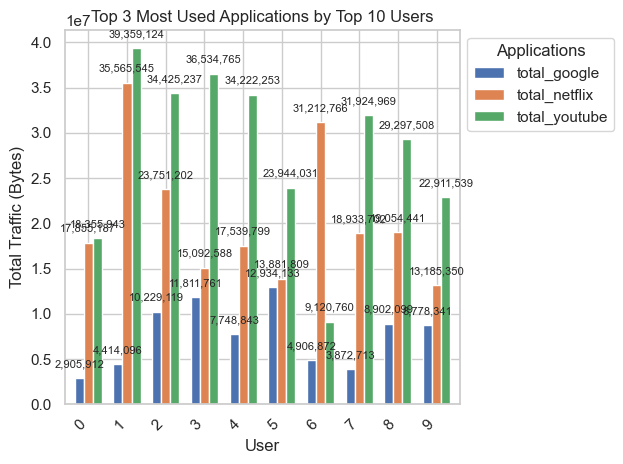

In [25]:
# Selecting the top 10 users for the top 3 apps
top_3_apps = new_df[['total_google', 'total_netflix', 'total_youtube']].head(10)
top_3_apps.to_csv("../../data/top_3_app_by_top_10_user.csv")
# Creating a grouped bar plot
sns.set(style="whitegrid")
ax = top_3_apps.plot(kind='bar', width=0.7)

plt.title('Top 3 Most Used Applications by Top 10 Users')
plt.xlabel('User')
plt.ylabel('Total Traffic (Bytes)')
plt.xticks(rotation=45, ha='right')  

# Adding data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customizing colors
ax.set_prop_cycle("color", sns.color_palette("viridis"))

# Adding legend
plt.legend(title='Applications', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()